# What is the most optimal skill to learn for Data Analysts?

#### Methodology

1. Group skills to determine median salary and likelihood of being in posting
2. Visualize median salary vs percent skill demand
3. (Optional) Determine if certain technologies are more prevalent

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\User\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_DA_GER = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Germany')].copy()

In [4]:
df_DA_GER = df_DA_GER.dropna(subset=['salary_year_avg'])

df_DA_GER_exploded = df_DA_GER.explode('job_skills')

df_DA_GER_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
20066,75067.5,r
20066,75067.5,python
20066,75067.5,java
20066,75067.5,c#
20066,75067.5,sql


In [16]:
df_DA_skills = df_DA_GER_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median' : 'median_salary'})

DA_job_count = len(df_DA_GER)

df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / DA_job_count * 100

skill_percent = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_percent]

df_DA_skills

,skill_count,median_salary,skill_percent
job_skills,,,
sql,24,101500.00,54.545455
python,18,111175.00,40.909091
tableau,13,100500.00,29.545455
spark,7,111175.00,15.909091
r,7,75067.50,15.909091
excel,7,105650.00,15.909091
looker,5,53014.00,11.363636
power bi,4,83937.50,9.090909
go,4,52014.00,9.090909


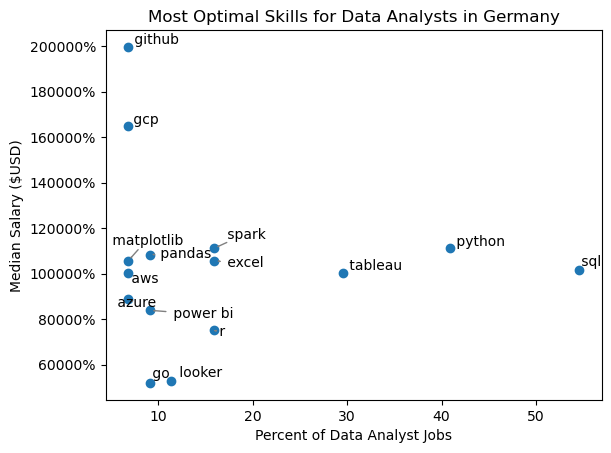

In [21]:
from adjustText import adjust_text

plt.scatter(df_DA_skills_high_demand['skill_percent'], df_DA_skills_high_demand['median_salary'])
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary ($USD)')  # Assuming this is the label you want for y-axis
plt.title('Most Optimal Skills for Data Analysts in Germany')

# Get current axes, set limits, and format axes
from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))  # Example formatting y-axis
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

# Add labels to points and collect them in a list
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], " " + txt))

# Adjust text to avoid overlap and add arrows
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.show()

In [22]:
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['looker',
  'tableau',
  'outlook',
  'nuix',
  'cognos',
  'datarobot',
  'spss',
  'dax',
  'excel',
  'qlik',
  'sheets',
  'sharepoint',
  'sap',
  'msaccess',
  'spreadsheet',
  'microstrategy',
  'word',
  'powerpoint',
  'power bi',
  'ssis',
  'visio',
  'ssrs',
  'ms access',
  'esquisse',
  'splunk',
  'powerbi',
  'alteryx',
  'sas'],
 'programming': ['f#',
  'fortran',
  'groovy',
  'bash',
  'mongodb',
  'c++',
  'objective-c',
  'powershell',
  'vb.net',
  'scala',
  'perl',
  'html',
  'python',
  'vba',
  'julia',
  'visualbasic',
  'ruby',
  'haskell',
  'elixir',
  'kotlin',
  'go',
  'javascript',
  'java',
  'css',
  'solidity',
  't-sql',
  'rust',
  'cobol',
  'golang',
  'lua',
  'erlang',
  'lisp',
  'assembly',
  'visual basic',
  'crystal',
  'c',
  'ocaml',
  'sass',
  'sql',
  'matlab',
  'php',
  'pascal',
  'c#',
  'no-sql',
  'delphi',
  'swift',
  'dart',
  'clojure',
  'nosql',
  'mongo',
  'shell',
  'r',
  'apl',
  'typescript',
  '

In [24]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,looker
0,analyst_tools,tableau
0,analyst_tools,outlook
0,analyst_tools,nuix
0,analyst_tools,cognos
...,...,...
9,sync,zoom
9,sync,wire
9,sync,symphony
9,sync,slack


In [27]:
df_plot = df_DA_skills_high_demand.merge(df_technology, left_on='job_skills', right_on='skills')

In [32]:
skill_limit = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_limit]

df_DA_skills_tech_high_demand = df_plot[df_plot['skill_percent'] > skill_limit]


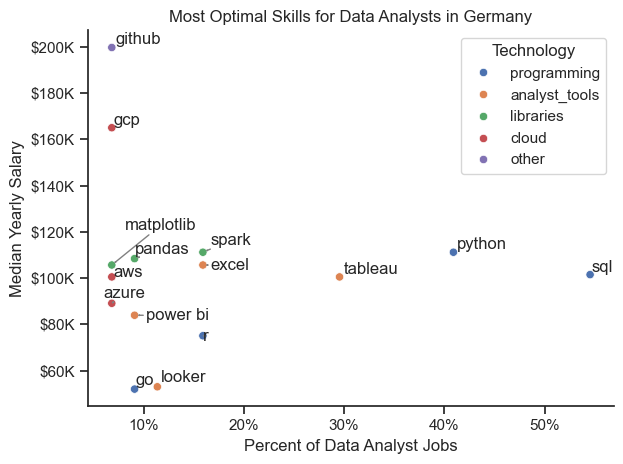

In [34]:
sns.scatterplot(
    data=df_DA_skills_tech_high_demand,
    x='skill_percent',
    y='median_salary',
    hue='technology'
)

sns.despine()
sns.set_theme(style='ticks')

# Prepare texts for adjustText
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# Set axis labels, title, and legend
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysts in Germany')
plt.legend(title='Technology')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Adjust layout and display plot 
plt.tight_layout()
plt.show()